In [78]:
import sys
sys.path.append("/Users/stapko/Documents/Shad/1_sem/C++/shad-cpp/numpy/cmake-build-debug")

In [79]:
from quantize import quantize
import bisect
import random

import pytest
import numpy as np
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
def quantize_slow(x, n):
    values = sorted(list(x))
    boundaries = [values[len(x) * p // n] for p in range(n)]

    quantized = [bisect.bisect_left(boundaries, x[i]) for i in range(len(x))]
    return np.array(boundaries), np.array(quantized)

In [90]:
array = np.array(range(9), dtype=np.float)
array = np.reshape(array, (3, 3))
print("Input array:")
print(array)

boundaries, quantized = quantize(array, 9)

print("Quantized:")
print(quantized)

Input array:
[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]]
Quantized:
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [81]:
%%capture

vector_size = np.arange(3000, 7000, 50)
time = {"C++" : [], "Python" : []}
number_of_iterations = 1000

for size in vector_size:
    n = 100
    vector = np.random.randn(size)
    c_time = timeit.timeit("quantize(vector, n)",
                              "from __main__ import quantize, vector, n",
                              number=number_of_iterations)
    time["C++"].append(c_time)
    python_time = timeit.timeit("quantize_slow(vector, n)",
                              "from __main__ import quantize_slow, vector, n",
                              number=number_of_iterations)
    time["Python"].append(python_time)
    
    

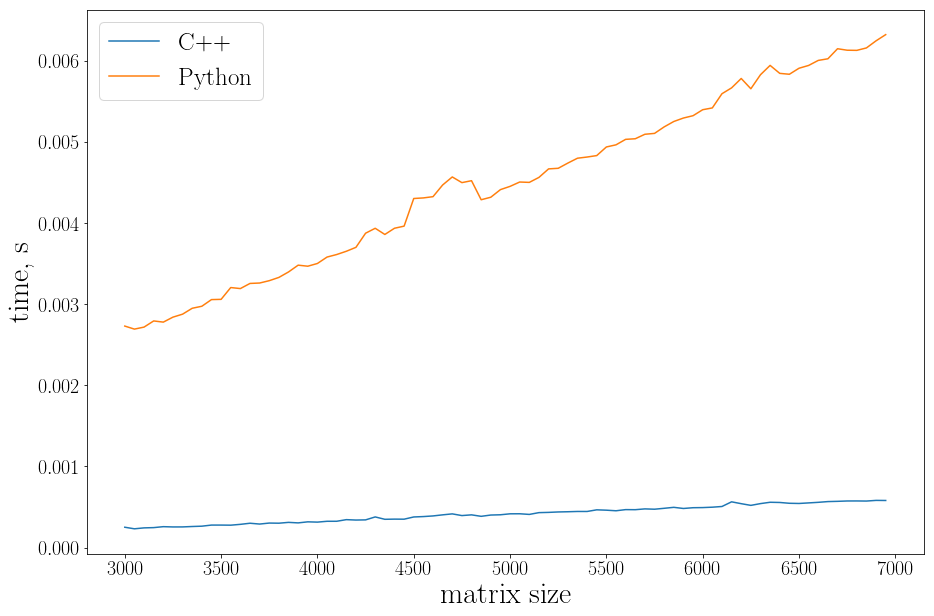

In [82]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(15,10))
plt.plot(vector_size, np.array(time["C++"]) / number_of_iterations, label="C++")
plt.plot(vector_size, np.array(time["Python"]) / number_of_iterations, label="Python")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("time, s", size=30)
plt.xlabel("matrix size", size=30)
plt.legend(prop={'size': 25})
plt.show()

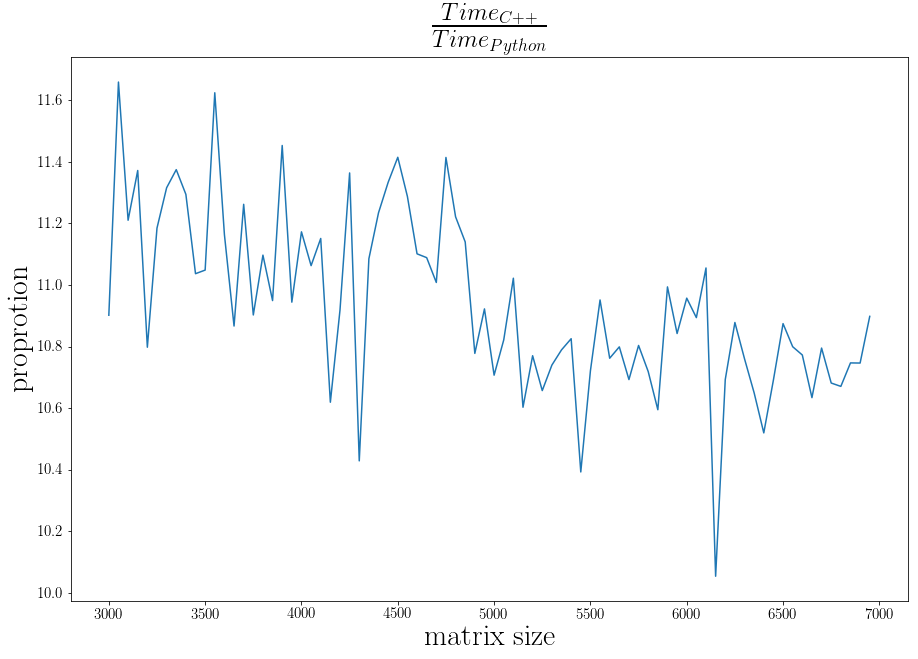

In [83]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15,10))
plt.plot(vector_size, np.array(time["Python"]) / np.array(time["C++"]))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("proprotion", size=30)
plt.xlabel("matrix size", size=30)
plt.legend(prop={'size': 15})
plt.title(r"$\frac{Time_{C++}}{Time_{Python}}$",fontsize=35)
plt.show()

In [48]:
%%capture

number_of_quantiles = np.arange(10, 7000, 50)
time = {"C++" : [], "Python" : []}
number_of_iterations = 1000

vector = np.random.randn(3000)
for n in number_of_quantiles:
    c_time = timeit.timeit("quantize(vector, n)",
                              "from __main__ import quantize, vector, n",
                              number=number_of_iterations)
    time["C++"].append(c_time)
    python_time = timeit.timeit("quantize_slow(vector, n)",
                              "from __main__ import quantize_slow, vector, n",
                              number=number_of_iterations)
    time["Python"].append(python_time)

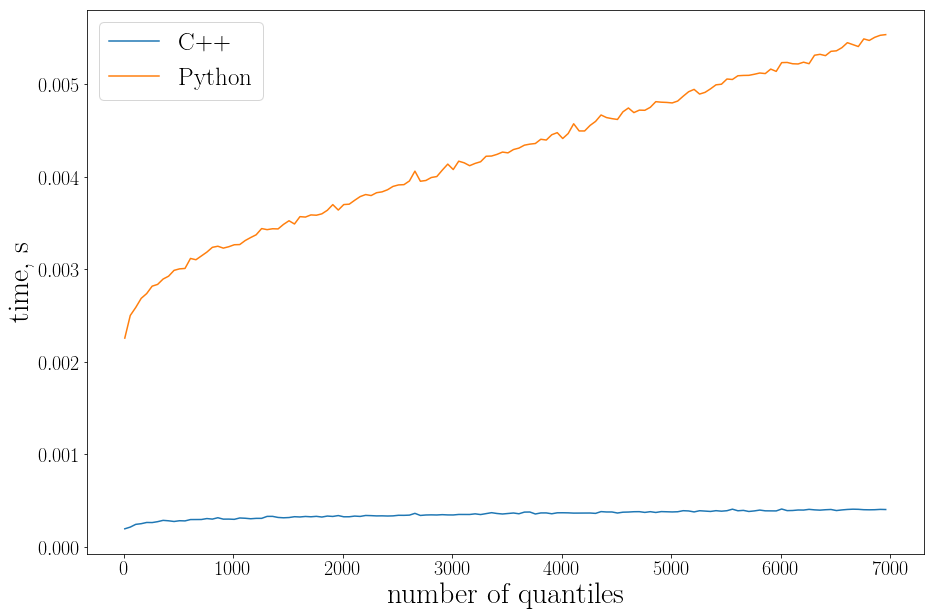

In [49]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(15,10))
plt.plot(number_of_quantiles, np.array(time["C++"]) / number_of_iterations, label="C++")
plt.plot(number_of_quantiles, np.array(time["Python"]) / number_of_iterations, label="Python")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("time, s", size=30)
plt.xlabel("number of quantiles", size=30)
plt.legend(prop={'size': 25})
plt.show()

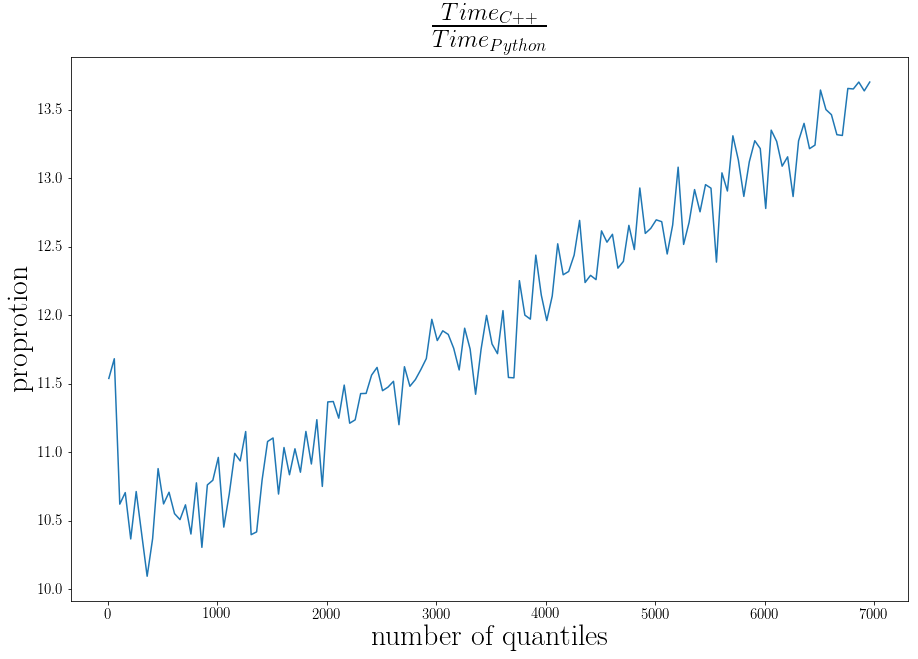

In [50]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15,10))
plt.plot(number_of_quantiles, np.array(time["Python"]) / np.array(time["C++"]))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("proprotion", size=30)
plt.xlabel("number of quantiles", size=30)
plt.legend(prop={'size': 15})
plt.title(r"$\frac{Time_{C++}}{Time_{Python}}$",fontsize=35)
plt.show()